In [1]:
import geopandas as gpd
from pathlib import Path

def load_geojson(file_path: str) -> gpd.GeoDataFrame:
    """
    Load a GeoJSON file into a GeoDataFrame.

    Args:
        file_path (str): The path to the GeoJSON file.

    Returns:
        gpd.GeoDataFrame: The loaded GeoDataFrame.

    Raises:
        FileNotFoundError: If the file does not exist.
        ValueError: If the file cannot be loaded as a GeoDataFrame.
    """
    path = Path(file_path)
    
    if not path.is_file():
        raise FileNotFoundError(f"The file '{file_path}' does not exist.")
    
    try:
        gdf = gpd.read_file(path)
    except Exception as error:
        raise ValueError(f"Failed to load the GeoJSON file: {error}")
    
    return gdf

# Usage
file_path = "/teamspace/studios/this_studio/somali-radios-with-ai-for-food-security/phase_1/data/Somalia-Somalia IPC Post GU 2024.json"

try:
    geo_df = load_geojson(file_path)
    print(geo_df)
except (FileNotFoundError, ValueError) as error:
    print(f"Error: {error}")


       aar_id                     title        gsu_analysis_title    anl_id  \
0    69455748  Somalia IPC Post GU 2024  Somalia IPC Post GU 2024  69455744   
1    69455750  Somalia IPC Post GU 2024  Somalia IPC Post GU 2024  69455744   
2    69455753  Somalia IPC Post GU 2024  Somalia IPC Post GU 2024  69455744   
3    69455756  Somalia IPC Post GU 2024  Somalia IPC Post GU 2024  69455744   
4    69455761  Somalia IPC Post GU 2024  Somalia IPC Post GU 2024  69455744   
..        ...                       ...                       ...       ...   
350  69456452  Somalia IPC Post GU 2024  Somalia IPC Post GU 2024  69455744   
351  69456458  Somalia IPC Post GU 2024  Somalia IPC Post GU 2024  69455744   
352  69456464  Somalia IPC Post GU 2024  Somalia IPC Post GU 2024  69455744   
353  69456466  Somalia IPC Post GU 2024  Somalia IPC Post GU 2024  69455744   
354  69456472  Somalia IPC Post GU 2024  Somalia IPC Post GU 2024  69455744   

    code  country               area analysis_date 

In [11]:
import pandas as pd

# Set display options for pandas DataFrame
pd.set_option('display.max_columns', None)

In [12]:
geo_df

,aar_id,title,gsu_analysis_title,anl_id,code,country,area,analysis_date,fanalysis_date,current_from_date,current_thru_date,projected_from_date,projected_thru_date,second_projected_from_date,second_projected_thru_date,current_period_dates,projected_period_dates,second_projected_period_dates,analysis_period,estimated_population_current,estimated_population_projected,estimated_population_second_projected,group_name,aag_id,condition,census_population,view_level,phase1_P_population,phase1_P_percentage,overall_phase_P,phase2_P_population,phase2_P_percentage,phase3_P_population,phase3_P_percentage,phase4_P_population,phase4_P_percentage,phase5_P_population,phase5_P_percentage,phase1_C_population,phase1_C_percentage,overall_phase_C,phase2_C_population,phase2_C_percentage,phase3_C_population,phase3_C_percentage,phase4_C_population,phase4_C_percentage,phase5_C_population,phase5_C_percentage,p3_plus_C_population_percentage,p3_plus_C_population,p3_plus_P_population_percentage,p3_plus_P_population,icons,geometry,color
0,69455748,Somalia IPC Post GU 2024,Somalia IPC Post GU 2024,69455744,SO,Somalia,Gaalkacyo (1),Aug 2024,20240813,Jul 2024,Sep 2024,Oct 2024,Dec 2024,None,None,Jul 2024 - Sep 2024,Oct 2024 - Dec 2024,,Oct 2024 - Dec 2024,153039,153039,0,Mudug,69455747,A,18706931,area,30610,0.20,3,53560,0.35,45910,0.30,22960,0.15,0,0,45910,0.30,3,53560,0.35,38260,0.25,15300,0.10,0,0,0.35,53560.0,0.45,68870.0,{ },"POLYGON ((47.39777 7.04528, 47.111 6.7312, 46....",#FF9F1C
1,69455750,Somalia IPC Post GU 2024,Somalia IPC Post GU 2024,69455744,SO,Somalia,Gaalkacyo (3),Aug 2024,20240813,Jul 2024,Sep 2024,Oct 2024,Dec 2024,None,None,Jul 2024 - Sep 2024,Oct 2024 - Dec 2024,,Oct 2024 - Dec 2024,187048,187048,0,Mudug,69455747,A,18706931,area,65470,0.35,3,84170,0.45,28060,0.15,9350,0.05,0,0,74820,0.40,2,84170,0.45,18700,0.10,9350,0.05,0,0,0.15,28050.0,0.20,37410.0,{ },"POLYGON ((47.5591 7.5619, 47.1998 7.1933, 47.1...",#FF9F1C
2,69455753,Somalia IPC Post GU 2024,Somalia IPC Post GU 2024,69455744,SO,Somalia,Bossaso,Aug 2024,20240813,Jul 2024,Sep 2024,Oct 2024,Dec 2024,None,None,Jul 2024 - Sep 2024,Oct 2024 - Dec 2024,,Oct 2024 - Dec 2024,83836,83836,0,Bari,69455752,A,18706931,area,41920,0.50,2,29340,0.35,12580,0.15,0,0.00,0,0,41920,0.50,2,29340,0.35,12580,0.15,0,0.00,0,0,0.15,12580.0,0.15,12580.0,{ },"POLYGON ((49.0411 10.3509, 49.1911 10.5209, 49...",#FFE066
3,69455756,Somalia IPC Post GU 2024,Somalia IPC Post GU 2024,69455744,SO,Somalia,Waajid,Aug 2024,20240813,Jul 2024,Sep 2024,Oct 2024,Dec 2024,None,None,Jul 2024 - Sep 2024,Oct 2024 - Dec 2024,,Oct 2024 - Dec 2024,31334,31334,0,Bakool,69455755,A,18706931,area,3130,0.10,3,12530,0.40,10970,0.35,4700,0.15,0,0,9400,0.30,3,10970,0.35,7830,0.25,3130,0.10,0,0,0.35,10960.0,0.50,15670.0,{ },"POLYGON ((43.79554 3.88696, 43.6949 3.9875, 43...",#FF9F1C
4,69455761,Somalia IPC Post GU 2024,Somalia IPC Post GU 2024,69455744,SO,Somalia,Luuq (1),Aug 2024,20240813,Jul 2024,Sep 2024,Oct 2024,Dec 2024,None,None,Jul 2024 - Sep 2024,Oct 2024 - Dec 2024,,Oct 2024 - Dec 2024,10653,10653,0,Gedo,69455760,A,18706931,area,4260,0.40,3,4260,0.40,2130,0.20,0,0.00,0,0,2660,0.25,3,4790,0.45,2660,0.25,530,0.05,0,0,0.30,3190.0,0.20,2130.0,{ },"POLYGON ((42.5777 3.4668, 42.556 3.5785, 42.65...",#FF9F1C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,69456452,Somalia IPC Post GU 2024,Somalia IPC Post GU 2024,69455744,SO,Somalia,Buur hakaba idps,Aug 2024,20240813,Jul 2024,Sep 2024,Oct 2024,Dec 2024,None,None,Jul 2024 - Sep 2024,Oct 2024 - Dec 2024,,Oct 2024 - Dec 2024,2976,2976,0,Bay,69455772,A,18706931,area,300,0.10,4,890,0.30,1040,0.35,740,0.25,0,0,600,0.20,4,890,0.30,890,0.30,600,0.20,0,0,0.50,1490.0,0.60,1780.0,{ },POINT (44.0123 2.7438),#FF4040
351,69456458,Somalia IPC Post GU 2024,Somalia IPC Post GU 2024,69455744,SO,Somalia,Xudun urban,Aug 2024,202408

In [4]:
geo_df.columns

Index(['aar_id', 'title', 'gsu_analysis_title', 'anl_id', 'code', 'country',
       'area', 'analysis_date', 'fanalysis_date', 'current_from_date',
       'current_thru_date', 'projected_from_date', 'projected_thru_date',
       'second_projected_from_date', 'second_projected_thru_date',
       'current_period_dates', 'projected_period_dates',
       'second_projected_period_dates', 'analysis_period',
       'estimated_population_current', 'estimated_population_projected',
       'estimated_population_second_projected', 'group_name', 'aag_id',
       'condition', 'census_population', 'view_level', 'phase1_P_population',
       'phase1_P_percentage', 'overall_phase_P', 'phase2_P_population',
       'phase2_P_percentage', 'phase3_P_population', 'phase3_P_percentage',
       'phase4_P_population', 'phase4_P_percentage', 'phase5_P_population',
       'phase5_P_percentage', 'phase1_C_population', 'phase1_C_percentage',
       'overall_phase_C', 'phase2_C_population', 'phase2_C_percentage',


In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pathlib import Path
from typing import Literal

# Define phase colors (similar to IPC map)
PHASE_COLORS = {
    1: "#B7E4C7",  # Light green
    2: "#FFE066",  # Yellow
    3: "#FF9F1C",  # Orange
    4: "#FF4040",  # Red
    5: "#800020",  # Dark Red
}

def plot_ipc_maps(
    geo_df: gpd.GeoDataFrame,
    mode: Literal["current", "projected", "both"] = "both"
) -> None:
    """
    Plot IPC phases maps for current, projected, or both periods.

    Args:
        geo_df (gpd.GeoDataFrame): The GeoDataFrame containing IPC data.
        mode (str): 'current', 'projected', or 'both' to select what to plot.

    Returns:
        None
    """
    if mode == "both":
        fig, axes = plt.subplots(1, 2, figsize=(24, 12))
        periods = [
            ("Current", "overall_phase_C", geo_df["current_period_dates"].iloc[0]),
            ("Projected", "overall_phase_P", geo_df["projected_period_dates"].iloc[0]),
        ]
    else:
        fig, axes = plt.subplots(1, 1, figsize=(12, 12))
        periods = []
        if mode == "current":
            periods.append(("Current", "overall_phase_C", geo_df["current_period_dates"].iloc[0]))
        elif mode == "projected":
            periods.append(("Projected", "overall_phase_P", geo_df["projected_period_dates"].iloc[0]))
        axes = [axes]

    for ax, (title, phase_column, period_dates) in zip(axes, periods):
        # Assign colors
        geo_df["color"] = geo_df[phase_column].map(PHASE_COLORS)

        # Plot each phase separately to control legend
        for phase, color in PHASE_COLORS.items():
            subset = geo_df[geo_df[phase_column] == phase]
            if not subset.empty:
                subset.plot(ax=ax, color=color, edgecolor="black", linewidth=0.5)

        # Titles and labels
        ax.set_title(f"{title} Period\n{period_dates}", fontsize=16)
        ax.set_xlabel("Longitude", fontsize=12)
        ax.set_ylabel("Latitude", fontsize=12)
        ax.grid(True)
        ax.axis("equal")

    # Custom legend (shared)
    patches = [
        mpatches.Patch(color=color, label=f"Phase {phase}")
        for phase, color in PHASE_COLORS.items()
    ]
    fig.legend(handles=patches, title="IPC Phase", loc="lower center", ncol=5, fontsize=12)

    plt.suptitle("Somalia IPC Maps", fontsize=22)
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()

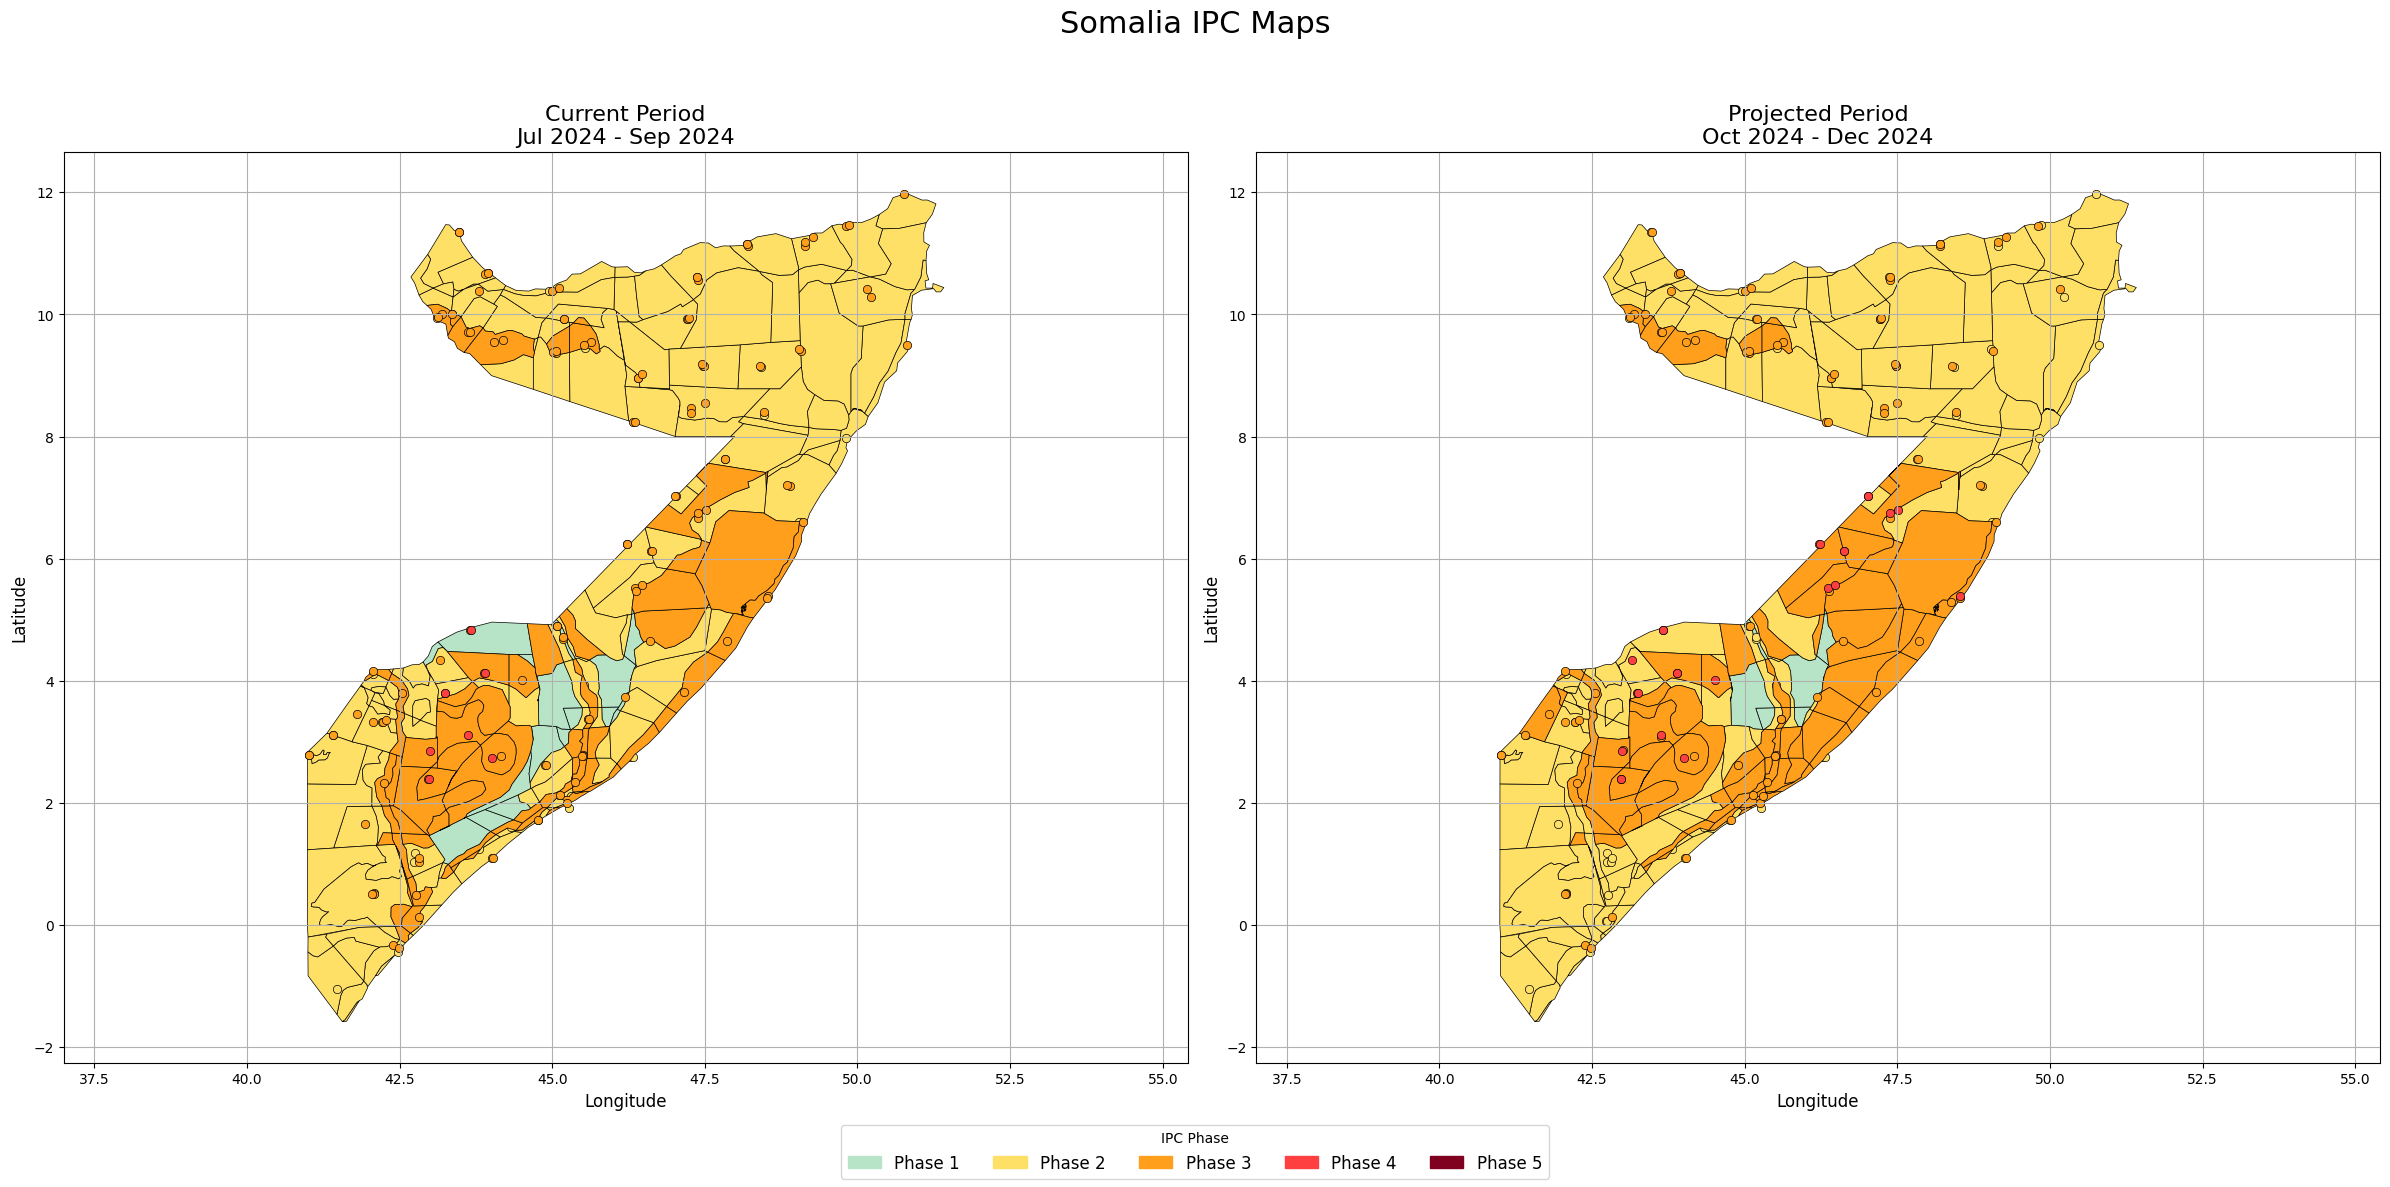

In [18]:
plot_ipc_maps(geo_df, mode="both")

In [20]:
target_file_path = "/teamspace/studios/this_studio/somali-radios-with-ai-for-food-security/phase_1/data/Somalia-Acute Food Insecurity January 2025.json"

try:
    geo_df_target = load_geojson(target_file_path)
    print(geo_df_target)
except (FileNotFoundError, ValueError) as error:
    print(f"Error: {error}")

       aar_id                               title gsu_analysis_title  \
0    77294495  Acute Food Insecurity January 2025               None   
1    77294497  Acute Food Insecurity January 2025               None   
2    77294500  Acute Food Insecurity January 2025               None   
3    77294509  Acute Food Insecurity January 2025               None   
4    77294511  Acute Food Insecurity January 2025               None   
..        ...                                 ...                ...   
350  77295200  Acute Food Insecurity January 2025               None   
351  77295208  Acute Food Insecurity January 2025               None   
352  77295212  Acute Food Insecurity January 2025               None   
353  77295214  Acute Food Insecurity January 2025               None   
354  77295216  Acute Food Insecurity January 2025               None   

       anl_id code  country              area analysis_date fanalysis_date  \
0    77294491   SO  Somalia     Gaalkacyo (1)      Jan 20

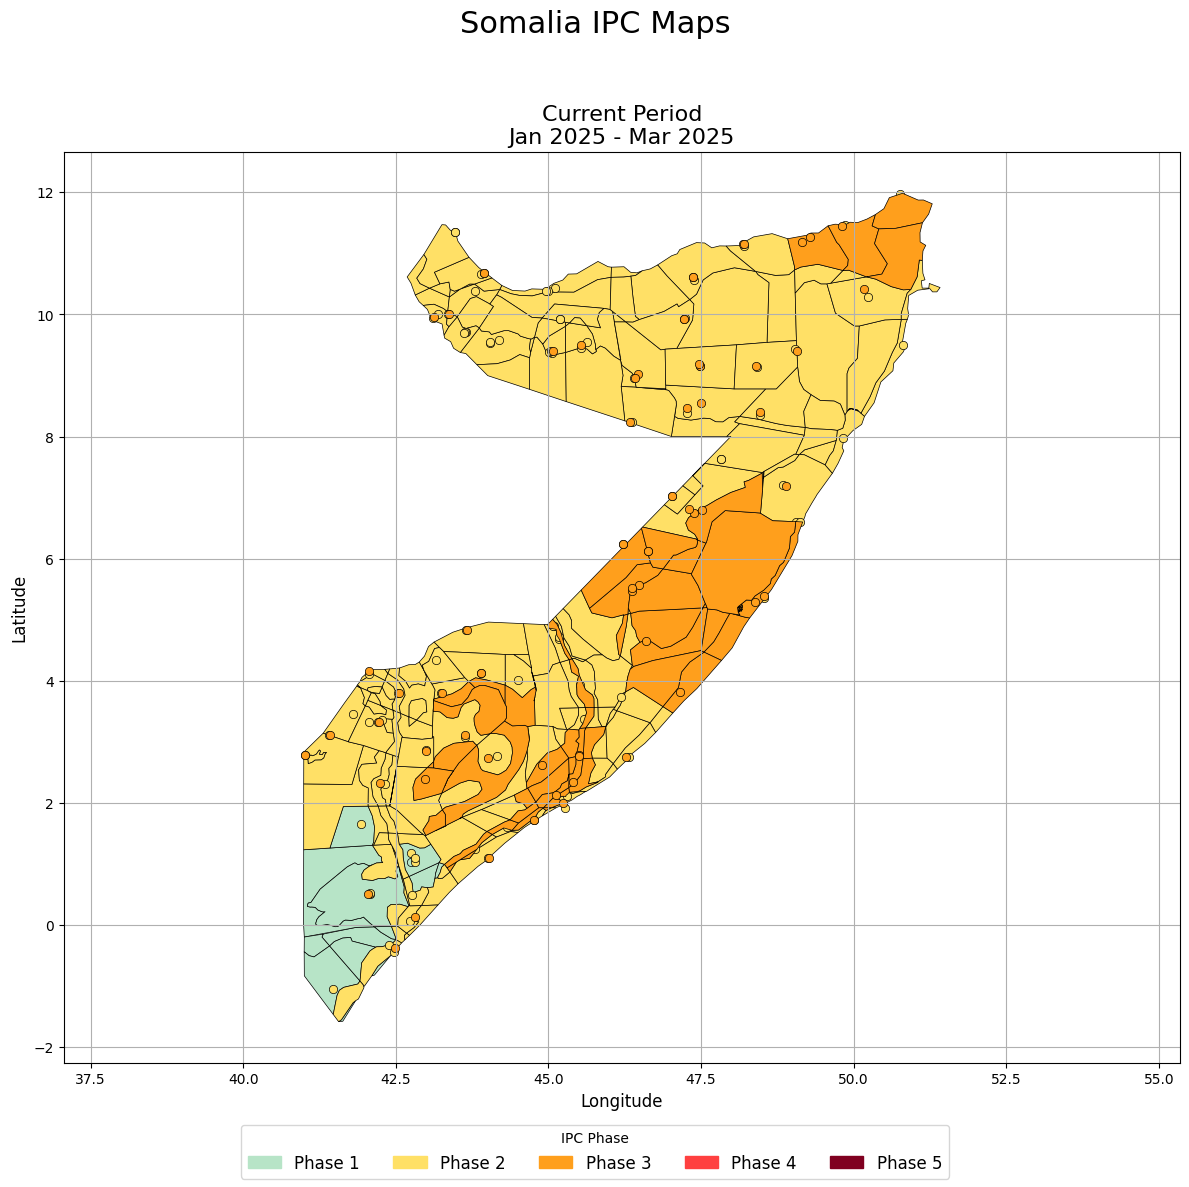

In [21]:
plot_ipc_maps(geo_df_target, mode="current")